<a href="https://colab.research.google.com/github/carissa406/deep-learning-535/blob/main/CarissaHicks_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forcasting of COVID deaths

# Inspecting and Cleaning Data


In [ ]:
!pip install pandas
import zipfile, os
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import random
random.seed(123)

In [ ]:
#get the data
!wget "https://uofi.box.com/shared/static/4bjhkchbo2chssjovpl97jduvcpy29v8.csv" -O covid.csv
df = pd.read_csv("/content/covid.csv")

--2022-11-09 02:22:51--  https://uofi.box.com/shared/static/4bjhkchbo2chssjovpl97jduvcpy29v8.csv
Resolving uofi.box.com (uofi.box.com)... 74.112.186.144
Connecting to uofi.box.com (uofi.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/4bjhkchbo2chssjovpl97jduvcpy29v8.csv [following]
--2022-11-09 02:22:51--  https://uofi.box.com/public/static/4bjhkchbo2chssjovpl97jduvcpy29v8.csv
Reusing existing connection to uofi.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://uofi.app.box.com/public/static/4bjhkchbo2chssjovpl97jduvcpy29v8.csv [following]
--2022-11-09 02:22:51--  https://uofi.app.box.com/public/static/4bjhkchbo2chssjovpl97jduvcpy29v8.csv
Resolving uofi.app.box.com (uofi.app.box.com)... 74.112.186.144
Connecting to uofi.app.box.com (uofi.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl2.boxcloud

In [ ]:
df.head()

,Unnamed: 0,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,...,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate
0,0,Alabama,US,2022-01-28 04:31:25,32.3182,-86.9023,1153149,16826,NaN,NaN,...,23518.366123,6901698.0,NaN,1.459135,84000001.0,USA,140759.485926,NaN,NaN,NaN
1,1,Alaska,US,2022-01-28 04:31:25,61.3707,-152.4044,206504,1081,NaN,NaN,...,28228.475350,3741734.0,NaN,0.523477,84000002.0,USA,511483.777485,NaN,NaN,NaN
2,2,American Samoa,US,2022-01-28 04:31:25,-14.2710,-170.1320,18,0,NaN,NaN,...,32.350245,2140.0,NaN,0.000000,16.0,ASM,3846.084722,NaN,NaN,NaN
3,3,Arizona,US,2022-01-28 04:31:25,33.7298,-111.4312,1813796,25932,NaN,NaN,...,24919.171882,17176458.0,NaN,1.429709,84000004.0,USA,235981.945719,NaN,NaN,NaN
4,4,Arkansas,US,2022-01-28 04:31:25,34.9697,-92.3731,762401,9596,NaN,NaN,...,25263.436592,4780951.0,NaN,1.258655,84000005.0,USA,158424.834747,NaN,NaN,NaN


In [ ]:
df.dtypes

Unnamed: 0                int64
Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                    float64
Incident_Rate           float64
Total_Test_Results      float64
People_Hospitalized     float64
Case_Fatality_Ratio     float64
UID                     float64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
People_Tested           float64
Mortality_Rate          float64
dtype: object

In [ ]:
#converting Last_Update to datetime
df['Last_Update']=pd.to_datetime(df['Last_Update'])
df.dtypes

Unnamed: 0                       int64
Province_State                  object
Country_Region                  object
Last_Update             datetime64[ns]
Lat                            float64
Long_                          float64
Confirmed                        int64
Deaths                           int64
Recovered                      float64
Active                         float64
FIPS                           float64
Incident_Rate                  float64
Total_Test_Results             float64
People_Hospitalized            float64
Case_Fatality_Ratio            float64
UID                            float64
ISO3                            object
Testing_Rate                   float64
Hospitalization_Rate           float64
People_Tested                  float64
Mortality_Rate                 float64
dtype: object

In [ ]:
#sort by province state and then last update
df = df.sort_values(by=['Province_State', 'Last_Update'])

In [ ]:
df

,Unnamed: 0,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,...,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate
18913,18913,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3667,93,NaN,NaN,...,74.788122,NaN,437.0,NaN,84000001.0,USA,1265.075660,12.264945,62029.0,2.536133
23035,23035,Alabama,US,2020-04-13 23:07:54,32.3182,-86.9023,3870,99,NaN,NaN,...,78.928288,NaN,457.0,NaN,84000001.0,USA,1318.245181,12.238886,64636.0,2.558140
19901,19901,Alabama,US,2020-04-14 23:33:31,32.3182,-86.9023,4041,114,NaN,NaN,...,82.415817,NaN,493.0,NaN,84000001.0,USA,1377.818704,12.471541,67557.0,2.821084
36904,36904,Alabama,US,2020-04-15 22:56:51,32.3182,-86.9023,4307,118,NaN,NaN,...,87.840863,NaN,525.0,NaN,84000001.0,USA,1444.428468,12.883436,70823.0,2.739726
27038,27038,Alabama,US,2020-04-16 23:30:51,32.3182,-86.9023,4465,133,NaN,NaN,...,91.063258,NaN,553.0,NaN,84000001.0,USA,1506.734908,12.727273,73878.0,2.978723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25065,25065,Wyoming,US,2022-03-22 04:31:02,42.7560,-107.3025,155907,1769,NaN,NaN,...,26938.155605,1383108.0,NaN,1.134651,84000056.0,USA,238978.227552,NaN,NaN,NaN
8817,8817,Wyoming,US,2022-03-23 04:31:22,42.7560,-107.3025,155988,1783,NaN,NaN,...,26952.151068,1383108.0,NaN,1.143037,84000056.0,USA,238978.227552,NaN,NaN,NaN
16476,16476,Wyoming,US,2022-03-24 04:31:09,42.7560,-107.3025,155988,1783,NaN,NaN,...,26952.151068,1385758.0,NaN,1.143037,84000056.0,USA,239436.103801,NaN,NaN,NaN
22163,22163,Wyoming,US,2022-03-25 04:31:26,42.7560,-107.3025,155988,1783,NaN,NaN,...,26952.151068,1385758.0,NaN,1.143037,84000056.0,USA,239436.103801,NaN,NaN,NaN


In [ ]:
#remove rows on certain condition
vals = ['Recovered', 'American Samoa', 'Diamond Princess', 'Grand Princess', 'Virgin Islands', 'Northern Mariana Islands']
df = df[df.Province_State.isin(vals) == False]

In [ ]:
#count num of rows in each remaining state
df['Province_State'].value_counts()

Alabama                 713
Montana                 713
Nevada                  713
New Hampshire           713
New Jersey              713
New Mexico              713
New York                713
North Carolina          713
North Dakota            713
Ohio                    713
Oklahoma                713
Oregon                  713
Pennsylvania            713
Puerto Rico             713
Rhode Island            713
South Carolina          713
South Dakota            713
Tennessee               713
Texas                   713
Utah                    713
Vermont                 713
Virginia                713
Washington              713
West Virginia           713
Wisconsin               713
Nebraska                713
Missouri                713
Alaska                  713
Mississippi             713
Arizona                 713
Arkansas                713
California              713
Colorado                713
Connecticut             713
Delaware                713
District of Columbia

In [ ]:
#drop all columns except a selection
df = df[['Last_Update', 'Incident_Rate', 'Confirmed', 'Deaths', 'Province_State']]
df

,Last_Update,Incident_Rate,Confirmed,Deaths,Province_State
18913,2020-04-12 23:18:15,74.788122,3667,93,Alabama
23035,2020-04-13 23:07:54,78.928288,3870,99,Alabama
19901,2020-04-14 23:33:31,82.415817,4041,114,Alabama
36904,2020-04-15 22:56:51,87.840863,4307,118,Alabama
27038,2020-04-16 23:30:51,91.063258,4465,133,Alabama
...,...,...,...,...,...
25065,2022-03-22 04:31:02,26938.155605,155907,1769,Wyoming
8817,2022-03-23 04:31:22,26952.151068,155988,1783,Wyoming
16476,2022-03-24 04:31:09,26952.151068,155988,1783,Wyoming
22163,2022-03-25 04:31:26,26952.151068,155988,1783,Wyoming


In [ ]:
#check if there are any missing values
df.isnull().sum()

Last_Update       0
Incident_Rate     0
Confirmed         0
Deaths            0
Province_State    0
dtype: int64

In [ ]:
year_series = df['Last_Update'].dt.year
month_series = df['Last_Update'].dt.month
dayofweek_series = df['Last_Update'].dt.dayofweek
day_series = df['Last_Update'].dt.day

In [ ]:
#replace last_update with 4 other columns
df['Year'] = year_series
df['Month'] = month_series
df['Day_Of_The_Week'] = dayofweek_series
df['Day'] = day_series
df.head()

,Last_Update,Incident_Rate,Confirmed,Deaths,Province_State,Year,Month,Day_Of_The_Week,Day
18913,2020-04-12 23:18:15,74.788122,3667,93,Alabama,2020,4,6,12
23035,2020-04-13 23:07:54,78.928288,3870,99,Alabama,2020,4,0,13
19901,2020-04-14 23:33:31,82.415817,4041,114,Alabama,2020,4,1,14
36904,2020-04-15 22:56:51,87.840863,4307,118,Alabama,2020,4,2,15
27038,2020-04-16 23:30:51,91.063258,4465,133,Alabama,2020,4,3,16


# Prepare time series for each Province_state

In [ ]:
#drop last_update
df = df.drop('Last_Update', axis=1)

In [ ]:
df.head()

,Incident_Rate,Confirmed,Deaths,Province_State,Year,Month,Day_Of_The_Week,Day
18913,74.788122,3667,93,Alabama,2020,4,6,12
23035,78.928288,3870,99,Alabama,2020,4,0,13
19901,82.415817,4041,114,Alabama,2020,4,1,14
36904,87.840863,4307,118,Alabama,2020,4,2,15
27038,91.063258,4465,133,Alabama,2020,4,3,16


In [ ]:
random.seed(123)
#takes variable, ds, containing aggregated counts and converts it to 7 day moving window average of daily counts
def convert_aggregated_to_MA(ds,window=7):
  ds = ds.diff()
  #replace a negative daily count with its previous count if previous count is positive; otherwise replace with 0
  for i in range(0, len(ds)):
    if((ds.iloc[i]<0)):
      if(ds.iloc[i-1]>0):
        ds.iloc[i]=ds.iloc[i-1]
      else:
        ds.iloc[i]=0
  #take moving average. window = 7 days
  return ds.rolling(window).mean()

In [ ]:
random.seed(123)
#counter to see if this is the first time in the loop
t = 0
#iterate through a list of all unique states and provinces names
for i in df.Province_State.unique():
  #state_df contains the current state's info
  state_df = df[df.Province_State == i]
  #drop the province state column from the state df
  state_df = state_df.drop('Province_State', axis=1)
  #apply the function to convert aggregated counts to moving averages
  state_df['Deaths'] = convert_aggregated_to_MA(state_df['Deaths'])
  state_df['Confirmed'] = convert_aggregated_to_MA(state_df['Confirmed'])
  #drop NAs that resulted from the conversion
  state_df = state_df.dropna()

  #get num of samples
  n = len(state_df)
  #60% for training
  num_train_samples = int(n*0.60)
  #15% for validation
  num_val_samples = int(n*.15)
  #25% for testing
  num_test_samples = int(n*.25)

  #normalize the data
  train_mean = state_df[:num_train_samples].mean(axis=0)
  train_std = state_df[:num_train_samples].std(axis=0)
  state_df = (state_df - train_mean)/train_std

  #create time series datasets
  #num of past observations to use for prediction (60 previous samples)
  sequence_length = 60 
  #number of samples in the batch
  batch_size = 256
  #delay = how many time steps into the future we want to predict (30 days into the future)
  delay = sequence_length + 30 - 1

  train_dataset = keras.preprocessing.timeseries_dataset_from_array(
  data=state_df[:-delay],
  targets=state_df['Deaths'][delay:],
  sequence_length=sequence_length,
  batch_size=batch_size,
  start_index=0,
  end_index=num_train_samples)

  val_dataset = keras.preprocessing.timeseries_dataset_from_array(
  data=state_df[:-delay],
  targets=state_df['Deaths'][delay:],
  sequence_length=sequence_length,
  batch_size=batch_size,
  start_index=num_train_samples,
  end_index=num_train_samples + num_val_samples)

  test_dataset = keras.preprocessing.timeseries_dataset_from_array(
  data=state_df[:-delay].to_numpy(),
  targets=state_df['Deaths'][delay:],
  sequence_length=sequence_length,
  batch_size=batch_size,
  start_index=num_train_samples + num_val_samples)

  if t == 0: 
    train = train_dataset
    test = test_dataset
    val = val_dataset
  else:
    train = train.concatenate(train_dataset)
    test = test.concatenate(test_dataset)
    val = val.concatenate(val_dataset)
  t += 1

In [ ]:
state_df

,Incident_Rate,Confirmed,Deaths,Year,Month,Day_Of_The_Week,Day
33767,-1.120312,-0.749888,-0.620931,-0.806723,-0.715535,1.496919,0.373696
34174,-1.120149,-0.750664,-0.680571,-0.806723,-0.715535,-1.489858,0.486929
2493,-1.115017,-0.658252,-0.680571,-0.806723,-0.715535,-0.992062,0.600162
39166,-1.114854,-0.659029,-0.442011,-0.806723,-0.715535,-0.494266,0.713395
14502,-1.114609,-0.661359,-0.442011,-0.806723,-0.715535,0.501327,0.939861
...,...,...,...,...,...,...,...
25065,5.217387,-0.656699,0.452586,3.280028,-1.022816,-0.992062,0.713395
8817,5.220686,-0.648933,0.094747,3.280028,-1.022816,-0.494266,0.826628
16476,5.220686,-0.648933,0.094747,3.280028,-1.022816,0.003530,0.939861
22163,5.220686,-0.648933,0.094747,3.280028,-1.022816,0.501327,1.053094


In [ ]:
#samples per batch,sequence length,number of variables in each sequence
for samples, targets in val.take(1):
    print(f"samples.shape:{samples.shape}  targets.shape:{targets.shape}")

samples.shape:(46, 60, 7)  targets.shape:(46,)


# A Commonsense Baseline Model

In [ ]:
random.seed(123)
#Commonsense Baseline model
def evaluate_model(dataset, model=None):
  total_abs_err = 0.
  num_sequences = 0
  #column index of Deaths
  temp_index = 2
  for samples, targets in dataset:
    if model == None:
      preds = samples[:,-1,temp_index]
    else:
      preds=model.predict(samples, verbose=0).flatten()
    total_abs_err += np.sum(np.abs(preds - targets))
    num_sequences += samples.shape[0]
  return total_abs_err / num_sequences
print(f"Validation MAE Baseline: {evaluate_model(val):.2f}")

Validation MAE Baseline: 1.07


In [ ]:
print(f"Validation MAE Baseline: {evaluate_model(test):.2f}")

Validation MAE Baseline: 1.44


Assuming deaths 30 days into the future will be the same as it is today, we would be off by 1.07 on average.

In [ ]:
#drop province state
df_withoutstate = df.drop('Province_State', axis=1)

# A small fully connected model

In [ ]:
random.seed(123)
#Small fully connected model 2 hidden layers
num_features = df_withoutstate.shape[-1]
def build_fcc(sequence_length, num_features):
  inputs = keras.Input(shape=(sequence_length, num_features))
  x = layers.Flatten()(inputs)
  x = layers.Dense(16, activation="relu")(x)
  x = layers.Dense(16, activation="relu")(x)
  outputs = layers.Dense(1)(x)
  fcc = keras.Model(inputs, outputs)
  return fcc

#learning rate scheduling
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

#define optimizer with rmsprop
opt = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)

#compile the model
fully_connected_model = build_fcc(sequence_length, num_features)
fully_connected_model.compile(optimizer=opt, loss="mse", metrics=["mae"])

#save checkpoint
checkpoint = keras.callbacks.ModelCheckpoint("temp_fully_connected.keras", save_best_only=True)

#callback for early stopping, stop if no improvement after 5 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-3, restore_best_weights=True)

In [ ]:
random.seed(123)
history = fully_connected_model.fit(train,
epochs=50,
validation_data=val,
callbacks=[checkpoint, early_stopping])

Epoch 1/50
2/2 [==============================] - 1s 261ms/step - loss: 2.1743 - mae: 1.2832 - val_loss: 2.0861 - val_mae: 1.3014
Epoch 2/50
2/2 [==============================] - 0s 93ms/step - loss: 1.0056 - mae: 0.8184 - val_loss: 2.4198 - val_mae: 1.4340
Epoch 3/50
2/2 [==============================] - 0s 86ms/step - loss: 0.6585 - mae: 0.6470 - val_loss: 2.2222 - val_mae: 1.3704
Epoch 4/50
2/2 [==============================] - 0s 115ms/step - loss: 0.5245 - mae: 0.5702 - val_loss: 2.0466 - val_mae: 1.3045
Epoch 5/50
2/2 [==============================] - 0s 108ms/step - loss: 0.4432 - mae: 0.5112 - val_loss: 1.9388 - val_mae: 1.2594
Epoch 6/50
2/2 [==============================] - 0s 123ms/step - loss: 0.3831 - mae: 0.4672 - val_loss: 1.8802 - val_mae: 1.2306
Epoch 7/50
2/2 [==============================] - 0s 101ms/step - loss: 0.3354 - mae: 0.4316 - val_loss: 1.8120 - val_mae: 1.1992
Epoch 8/50
2/2 [==============================] - 0s 111ms/step - loss: 0.2973 - mae: 0.4033

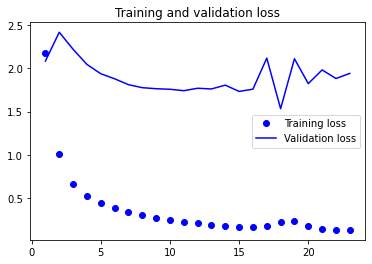

In [ ]:
random.seed(123)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

The validation loss is much higher than the training loss so the model is overfitting.

In [ ]:
random.seed(123)
#Small STACK of fully connected model with L2 regularization  and dropout layer
num_features = df_withoutstate.shape[-1]
def build_regularized(sequence_length, num_features):
  inputs = keras.Input(shape=(sequence_length, num_features))
  x = layers.Flatten()(inputs)
  x = layers.Dense(16, activation="relu", kernel_regularizer = regularizers.l2(0.001))(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(16, activation="relu", kernel_regularizer = regularizers.l2(0.001))(x)
  x = layers.Dropout(0.5)(x)
  outputs = layers.Dense(1)(x)
  fcc = keras.Model(inputs, outputs)
  return fcc

#learning rate scheduling
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

#define optimizer with rmsprop
opt = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)

#compile the model
regularized_model = build_regularized(sequence_length, num_features)
regularized_model.compile(optimizer=opt, loss="mse", metrics=["mae"])

#save checkpoint
checkpoint = keras.callbacks.ModelCheckpoint("temp_regularized.keras", save_best_only=True)

#callback for early stopping, stop if no improvement after 5 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-3, restore_best_weights=True)

history = regularized_model.fit(train,
epochs=50,
validation_data=val,
callbacks=[checkpoint, early_stopping])

Epoch 1/50
2/2 [==============================] - 1s 248ms/step - loss: 3.1504 - mae: 1.3034 - val_loss: 3.7355 - val_mae: 1.7672
Epoch 2/50
2/2 [==============================] - 0s 110ms/step - loss: 1.8764 - mae: 1.0069 - val_loss: 3.6798 - val_mae: 1.7593
Epoch 3/50
2/2 [==============================] - 0s 100ms/step - loss: 2.1519 - mae: 1.0495 - val_loss: 3.8553 - val_mae: 1.8203
Epoch 4/50
2/2 [==============================] - 0s 78ms/step - loss: 1.4980 - mae: 0.9087 - val_loss: 3.8020 - val_mae: 1.8065
Epoch 5/50
2/2 [==============================] - 0s 84ms/step - loss: 1.4115 - mae: 0.8643 - val_loss: 3.7855 - val_mae: 1.8043
Epoch 6/50
2/2 [==============================] - 0s 95ms/step - loss: 1.3148 - mae: 0.8581 - val_loss: 3.9546 - val_mae: 1.8606
Epoch 7/50
2/2 [==============================] - 0s 96ms/step - loss: 1.2976 - mae: 0.8449 - val_loss: 3.9037 - val_mae: 1.8477
Epoch 8/50
2/2 [==============================] - 0s 88ms/step - loss: 1.1272 - mae: 0.7825 - 

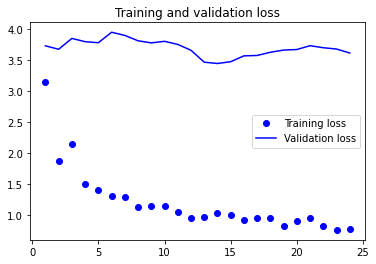

In [ ]:
random.seed(123)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

After adding dropout and L2 regularization, the training and validation loss lines are closer together and validation loss stays relatively the same... but validation loss is still higher than training loss so it is still overfitting


In [ ]:
for samples, targets in train.take(1):
    print(f"samples.shape:{samples.shape}  targets.shape:{targets.shape}")
    print(f"x={samples[0]},y={targets[0]}")

samples.shape:(256, 60, 7)  targets.shape:(256,)
x=[[-1.12031178 -0.74988759 -0.62093074 -0.80672273 -0.71553548  1.4969192
   0.37369596]
 [-1.12014885 -0.75066416 -0.68057054 -0.80672273 -0.71553548 -1.48985826
   0.48692904]
 [-1.11501658 -0.65825233 -0.68057054 -0.80672273 -0.71553548 -0.99206202
   0.60016213]
 [-1.11485365 -0.6590289  -0.44201132 -0.80672273 -0.71553548 -0.49426577
   0.71339522]
 [-1.11460926 -0.66135861 -0.44201132 -0.80672273 -0.71553548  0.50132671
   0.93986139]
 [-1.11379461 -0.65281634 -0.44201132 -0.80672273 -0.71553548  0.99912296
   1.05309448]
 [-1.11306143 -0.64194436 -0.44201132 -0.80672273 -0.71553548  1.4969192
   1.16632757]
 [-1.11261338 -0.63650837 -0.44201132 -0.80672273 -0.71553548 -1.48985826
   1.27956066]
 [-1.1118802  -0.62563639 -0.44201132 -0.80672273 -0.71553548 -0.99206202
   1.39279374]
 [-1.11122848 -0.71105909 -0.44201132 -0.80672273 -0.71553548 -0.49426577
   1.50602683]
 [-1.11086189 -0.70717624 -0.68057054 -0.80672273 -0.71553548

In [ ]:
pip install -q -U keras-tuner

In [ ]:
#using hyperband to tune the hyperparameters learning rate, dropout rate, and num of neurons
random.seed(123)
#placeholders for each hyperparameter
def model_builder(hp):
  hp_lr_decay_steps = hp.Choice("lr_decay_steps", values=(1000, 5000, 10000))
  hp_learningrate=hp.Float("initial_learning_rate",min_value=1e-4, max_value=1e-2, sampling='log')
  hp_dropout_rate = hp.Float('dropout', min_value = 0,max_value = 0.5, step = 0.1)

  input = keras.Input(shape = (60,7))
  
  x = layers.Flatten()(input)

  x = layers.Dense(16, activation='relu', kernel_regularizer = regularizers.l2(0.001))(x)
  x = layers.Dropout(hp_dropout_rate)(x)

  output = layers.Dense(1)(x)
  
  model = keras.Model(inputs=input,  outputs=output)

  #learning rate scheduling
  lr_schedule = keras.optimizers.schedules.ExponentialDecay(
      initial_learning_rate= hp_learningrate,
      decay_steps=hp_lr_decay_steps, 
      decay_rate=0.9)
  
  opt = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)

  model.compile(optimizer=opt, loss="mse", metrics=["mae"])

  return model

In [ ]:
import keras_tuner as kt
tuner = kt.Hyperband(model_builder,
                     objective = 'mae', 
                     max_epochs = 20,
                     factor = 3,
                     directory = 'hyperparameter_runs',
                     project_name = 'covid_deaths')  

In [ ]:
random.seed(123)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-3, restore_best_weights=True)

tensorboard = keras.callbacks.TensorBoard(
log_dir="/content/drive/MyDrive/tensorboard_logs/hyperband",
histogram_freq=1
)
#remove the log directory if already exists
!rm -rf "/content/drive/MyDrive/tensorboard_logs/hyperband"

tuner.search(train, 
             validation_data = val, 
             epochs=10, 
             callbacks=[early_stopping],
             verbose = 1)


In [ ]:
random.seed(123)
best_hps=tuner.get_best_hyperparameters()[0]
best_model=tuner.get_best_models(num_models=1)[0]
print(f"""
The hyperparameter search is complete.
The optimal learning rate for the optimizer is {best_hps.get('initial_learning_rate')}. 
The optimal dropout is {best_hps.get('dropout')}.  
The optimal decay_steps for cosine schedule is {best_hps.get('lr_decay_steps')}. 
""")


The hyperparameter search is complete.
The optimal learning rate for the optimizer is 0.0008725920375456185. 
The optimal dropout is 0.0.  
The optimal decay_steps for cosine schedule is 10000. 



In [ ]:
checkpoint= keras.callbacks.ModelCheckpoint("fully_connected.keras",save_best_only=True)
random.seed(123)
model = tuner.hypermodel.build(best_hps)
history = model.fit(train, epochs = 50)

Epoch 1/50
2/2 [==============================] - 1s 27ms/step - loss: 1.0878 - mae: 0.8120
Epoch 2/50
2/2 [==============================] - 0s 28ms/step - loss: 1.4586 - mae: 0.9772
Epoch 3/50
2/2 [==============================] - 0s 28ms/step - loss: 0.6819 - mae: 0.6573
Epoch 4/50
2/2 [==============================] - 0s 34ms/step - loss: 0.6142 - mae: 0.5760
Epoch 5/50
2/2 [==============================] - 0s 31ms/step - loss: 0.4992 - mae: 0.5388
Epoch 6/50
2/2 [==============================] - 0s 34ms/step - loss: 0.4570 - mae: 0.4959
Epoch 7/50
2/2 [==============================] - 0s 29ms/step - loss: 0.4081 - mae: 0.4771
Epoch 8/50
2/2 [==============================] - 0s 26ms/step - loss: 0.3880 - mae: 0.4555
Epoch 9/50
2/2 [==============================] - 0s 35ms/step - loss: 0.3611 - mae: 0.4439
Epoch 10/50
2/2 [==============================] - 0s 39ms/step - loss: 0.3485 - mae: 0.4278
Epoch 11/50
2/2 [==============================] - 0s 47ms/step - loss: 0.3301 

In [ ]:

print(f"validation MAE small fully connected model with hyperparameter tuning: {evaluate_model(val, model=fully_connected_model):.2f}")
print(f"test MAE small fully connected model with hyperparameter tuning: {evaluate_model(test, model=fully_connected_model):.2f}")

validation MAE small fully connected model with hyperparameter tuning: 1.04
test MAE small fully connected model with hyperparameter tuning: 0.84


# Recurrent Model

In [ ]:
random.seed(123)
#recurrent  model with learning rate scheduling and early stopping
def build_lstm(sequence_length, num_features):
  inputs = keras.Input(shape=(sequence_length, num_features))
  x = layers.LSTM(16)(inputs)
  #x = layers.Dropout(0.2)(x)
  outputs = layers.Dense(1)(x)
  lstm_model = keras.Model(inputs, outputs)
  return lstm_model

#learning rate scheduling
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

#define optimizer with rmsprop
opt = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)

#compile the model
lstm_model = build_lstm(sequence_length, num_features)
lstm_model.compile(optimizer=opt, loss="mse", metrics=["mae"])

checkpoint= keras.callbacks.ModelCheckpoint("temp_lstm.keras",save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-4, restore_best_weights=True)


In [ ]:
random.seed(123)
lstm_model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = lstm_model.fit(train,
epochs=50,
validation_data=val,
callbacks=[checkpoint, early_stopping])

Epoch 1/50
2/2 [==============================] - 7s 1s/step - loss: 0.8741 - mae: 0.6859 - val_loss: 3.6201 - val_mae: 1.7976
Epoch 2/50
2/2 [==============================] - 0s 244ms/step - loss: 0.7620 - mae: 0.6333 - val_loss: 3.6215 - val_mae: 1.7993
Epoch 3/50
2/2 [==============================] - 0s 234ms/step - loss: 0.6908 - mae: 0.5976 - val_loss: 3.6154 - val_mae: 1.7986
Epoch 4/50
2/2 [==============================] - 0s 273ms/step - loss: 0.6343 - mae: 0.5678 - val_loss: 3.6039 - val_mae: 1.7963
Epoch 5/50
2/2 [==============================] - 1s 583ms/step - loss: 0.5866 - mae: 0.5426 - val_loss: 3.5877 - val_mae: 1.7925
Epoch 6/50
2/2 [==============================] - 1s 391ms/step - loss: 0.5452 - mae: 0.5203 - val_loss: 3.5671 - val_mae: 1.7873
Epoch 7/50
2/2 [==============================] - 0s 150ms/step - loss: 0.5088 - mae: 0.5002 - val_loss: 3.5421 - val_mae: 1.7808
Epoch 8/50
2/2 [==============================] - 0s 154ms/step - loss: 0.4764 - mae: 0.4839 

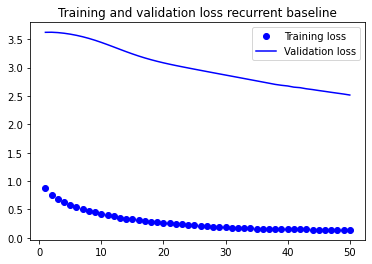

In [ ]:
random.seed(123)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss recurrent baseline')
plt.legend()
plt.show()

The validation curve looks better but the model is still overfitting

In [ ]:
# load the checkpointed model and compute its test MAE
lstm_model = keras.models.load_model("temp_lstm.keras")

print(f"Validation MAE lstm: {evaluate_model(val, model=lstm_model):.2f}")

Validation MAE lstm: 1.46


In [ ]:
random.seed(123)
#recurrent  model with learning rate scheduling and early stopping
def build_lstm2(sequence_length, num_features):
  inputs = keras.Input(shape=(sequence_length, num_features))
  x = layers.LSTM(16, recurrent_dropout=0.2)(inputs)
  outputs = layers.Dense(1)(x)
  lstm_model = keras.Model(inputs, outputs)
  return lstm_model

#learning rate scheduling
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

#define optimizer with rmsprop
opt = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)

#compile the model
lstm_model2 = build_lstm2(sequence_length, num_features)
lstm_model2.compile(optimizer=opt, loss="mse", metrics=["mae"])

checkpoint= keras.callbacks.ModelCheckpoint("temp_lstm.keras",save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-4, restore_best_weights=True)

In [ ]:
random.seed(123)
lstm_model2.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = lstm_model2.fit(train,
epochs=50,
validation_data=val,
callbacks=[checkpoint, early_stopping])

Epoch 1/50
2/2 [==============================] - 4s 522ms/step - loss: 0.7454 - mae: 0.6251 - val_loss: 1.7299 - val_mae: 1.1804
Epoch 2/50
2/2 [==============================] - 0s 169ms/step - loss: 0.6195 - mae: 0.5533 - val_loss: 1.7016 - val_mae: 1.1701
Epoch 3/50
2/2 [==============================] - 0s 165ms/step - loss: 0.5552 - mae: 0.5098 - val_loss: 1.6696 - val_mae: 1.1584
Epoch 4/50
2/2 [==============================] - 0s 177ms/step - loss: 0.5073 - mae: 0.4749 - val_loss: 1.6360 - val_mae: 1.1455
Epoch 5/50
2/2 [==============================] - 0s 210ms/step - loss: 0.4700 - mae: 0.4508 - val_loss: 1.6020 - val_mae: 1.1321
Epoch 6/50
2/2 [==============================] - 0s 157ms/step - loss: 0.4385 - mae: 0.4338 - val_loss: 1.5660 - val_mae: 1.1174
Epoch 7/50
2/2 [==============================] - 0s 170ms/step - loss: 0.4153 - mae: 0.4211 - val_loss: 1.5286 - val_mae: 1.1017
Epoch 8/50
2/2 [==============================] - 0s 167ms/step - loss: 0.3880 - mae: 0.40

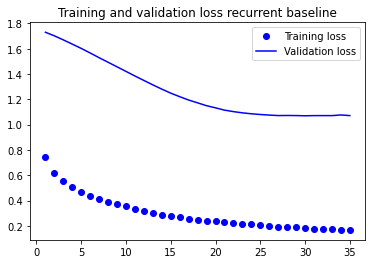

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss recurrent baseline')
plt.legend()
plt.show()

In [ ]:
random.seed(123)
# load the checkpointed model and compute its test MAE
lstm_model2 = keras.models.load_model("temp_lstm.keras")

print(f"Validation MAE lstm with dropout: {evaluate_model(val, model=lstm_model2):.2f}")

Validation MAE lstm with dropout: 0.87


In [ ]:
random.seed(123)
#recurrent  model with learning rate scheduling and early stopping, dropout, add more layers
def build_stacked_lstm(sequence_length, num_features):
  inputs = keras.Input(shape=(sequence_length, num_features))
  x = layers.LSTM(16, recurrent_dropout=0.2, return_sequences=True)(inputs)
  x = layers.LSTM(16, recurrent_dropout=0.2)(x)
  outputs = layers.Dense(1)(x)
  model = keras.Model(inputs, outputs)
  return model

#learning rate scheduling
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

#define optimizer with rmsprop
opt = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)

#compile the model
stacked_lstm_model = build_lstm2(sequence_length, num_features)
stacked_lstm_model.compile(optimizer=opt, loss="mse", metrics=["mae"])

checkpoint= keras.callbacks.ModelCheckpoint("temp_stacked_lstm.keras",save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-4, restore_best_weights=True)

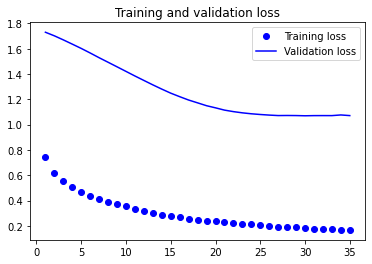

In [ ]:
random.seed(123)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:

print(f"Validation MAE stacked lstm: {evaluate_model(val, model=stacked_lstm_model):.2f}")

Validation MAE stacked lstm: 1.55


adding the additional layer made the MAE go from 1.39 to 1.45

In [ ]:
#using hyperband to tune the hyperparameters learning rate, dropout rate, and num of neurons
random.seed(123)
#placeholders for each hyperparameter
def model_builder(hp):
  hp_lr_decay_steps = hp.Choice("lr_decay_steps", values=(1000, 5000, 10000))
  hp_learningrate=hp.Float("initial_learning_rate",min_value=1e-4, max_value=1e-2, sampling='log')
  hp_dropout_rate = hp.Float('dropout', min_value = 0,max_value = 0.5, step = 0.1)

  input = keras.Input(shape = (60,7))
  
  x = layers.LSTM(16, recurrent_dropout=hp_dropout_rate, return_sequences=True)(input)
  x = layers.LSTM(16, recurrent_dropout=hp_dropout_rate)(x)

  output = layers.Dense(1)(x)
  
  model = keras.Model(inputs=input,  outputs=output)

  #learning rate scheduling
  lr_schedule = keras.optimizers.schedules.ExponentialDecay(
      initial_learning_rate= hp_learningrate,
      decay_steps=hp_lr_decay_steps, 
      decay_rate=0.9)
  
  opt = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)

  model.compile(optimizer=opt, loss="mse", metrics=["mae"])

  return model

In [ ]:
import keras_tuner as kt
tuner = kt.Hyperband(model_builder,
                     objective = 'mae', 
                     max_epochs = 20,
                     factor = 3,
                     directory = 'hyperparameter_runs',
                     project_name = 'covid_deaths')  
					 
random.seed(123)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-3, restore_best_weights=True)


In [ ]:
tensorboard = keras.callbacks.TensorBoard(
log_dir="/content/drive/MyDrive/tensorboard_logs/hyperband",
histogram_freq=1
)
#remove the log directory if already exists
!rm -rf "/content/drive/MyDrive/tensorboard_logs/hyperband"

tuner.search(train, 
             validation_data = val, 
             epochs=10, 
             callbacks=[early_stopping],
             verbose = 1)

In [ ]:
random.seed(123)
best_hps=tuner.get_best_hyperparameters()[0]
best_model=tuner.get_best_models(num_models=1)[0]
print(f"""
The hyperparameter search is complete.
The optimal learning rate for the optimizer is {best_hps.get('initial_learning_rate')}. 
The optimal dropout is {best_hps.get('dropout')}.  
The optimal decay_steps for cosine schedule is {best_hps.get('lr_decay_steps')}. 
""")


The hyperparameter search is complete.
The optimal learning rate for the optimizer is 0.0008725920375456185. 
The optimal dropout is 0.0.  
The optimal decay_steps for cosine schedule is 10000. 



In [ ]:
random.seed(123)
model = tuner.hypermodel.build(best_hps)
history = model.fit(train, epochs = 50)

Epoch 1/50
2/2 [==============================] - 5s 87ms/step - loss: 1.3999 - mae: 0.9448
Epoch 2/50
2/2 [==============================] - 0s 85ms/step - loss: 1.0882 - mae: 0.8153
Epoch 3/50
2/2 [==============================] - 0s 88ms/step - loss: 0.9235 - mae: 0.7317
Epoch 4/50
2/2 [==============================] - 0s 97ms/step - loss: 0.8038 - mae: 0.6628
Epoch 5/50
2/2 [==============================] - 0s 86ms/step - loss: 0.7111 - mae: 0.6059
Epoch 6/50
2/2 [==============================] - 0s 81ms/step - loss: 0.6365 - mae: 0.5606
Epoch 7/50
2/2 [==============================] - 0s 85ms/step - loss: 0.5749 - mae: 0.5257
Epoch 8/50
2/2 [==============================] - 0s 87ms/step - loss: 0.5226 - mae: 0.4964
Epoch 9/50
2/2 [==============================] - 0s 94ms/step - loss: 0.4775 - mae: 0.4695
Epoch 10/50
2/2 [==============================] - 0s 79ms/step - loss: 0.4378 - mae: 0.4448
Epoch 11/50
2/2 [==============================] - 0s 83ms/step - loss: 0.4026 

In [ ]:
random.seed(123)
print(f"validation MAE LSTM model with hyperparameter tuning: {evaluate_model(val, model=model):.2f}")
print(f"test MAE small fully connected model with hyperparameter tuning: {evaluate_model(test, model=model):.2f}")

validation MAE LSTM model with hyperparameter tuning: 0.79
test MAE small fully connected model with hyperparameter tuning: 1.03



*   The baseline model had MAE = 1.07
*   The fully connected model with hyperparameter tuning MAE = 1.67
*   LSTM model with hyperparameter tuning MAE = 1.49

This model did better than the fully connected model but still not better than the baseline model




# A 1D Convolutional Model

In [ ]:
random.seed(123)
def build_1dconv(sequence_length, num_features):
  inputs = keras.Input(shape=(sequence_length, num_features))
  
  # a 1D convolutional layer with 8 filters and a kernel/window of size 14
  x = layers.Conv1D(8, 14, activation="relu")(inputs)
  x = layers.MaxPooling1D(2)(x)
  
  # a 1D convolutional layer with 8 filters and a kernel of size 14
  x = layers.Conv1D(8, 14, activation="relu")(x)
  x = layers.MaxPooling1D(2)(x)
  
  # a golobal average pooling layer that takes the global average along the temporal dimension
  x = layers.GlobalAveragePooling1D()(x)
  outputs = layers.Dense(1)(x)
  model = keras.Model(inputs, outputs)
  return model
conv1D_model= build_1dconv(sequence_length, num_features)

conv1D_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 60, 7)]           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 47, 8)             792       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 23, 8)            0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 10, 8)             904       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 5, 8)             0         
 1D)                                                             
                                                                 
 global_average_pooling1d_1   (None, 8)                0   

In [ ]:
# check point the best model
checkpoint= keras.callbacks.ModelCheckpoint("temp_conv1d.keras",save_best_only=True)

conv1D_model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = conv1D_model.fit(train,
epochs=50,
validation_data=val,
callbacks=[checkpoint, early_stopping])

Epoch 1/50
2/2 [==============================] - 1s 253ms/step - loss: 0.9554 - mae: 0.7674 - val_loss: 3.8483 - val_mae: 1.8745
Epoch 2/50
2/2 [==============================] - 0s 122ms/step - loss: 0.6815 - mae: 0.6086 - val_loss: 2.1793 - val_mae: 1.3680
Epoch 3/50
2/2 [==============================] - 0s 88ms/step - loss: 0.5766 - mae: 0.5760 - val_loss: 2.5855 - val_mae: 1.5093
Epoch 4/50
2/2 [==============================] - 0s 111ms/step - loss: 0.4920 - mae: 0.5004 - val_loss: 2.0699 - val_mae: 1.3360
Epoch 5/50
2/2 [==============================] - 0s 94ms/step - loss: 0.4565 - mae: 0.5003 - val_loss: 2.1329 - val_mae: 1.3600
Epoch 6/50
2/2 [==============================] - 0s 116ms/step - loss: 0.4140 - mae: 0.4630 - val_loss: 1.9264 - val_mae: 1.2855
Epoch 7/50
2/2 [==============================] - 0s 120ms/step - loss: 0.3868 - mae: 0.4537 - val_loss: 1.9239 - val_mae: 1.2849
Epoch 8/50
2/2 [==============================] - 0s 113ms/step - loss: 0.3572 - mae: 0.4238

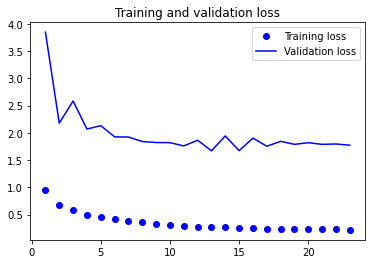

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
print(f"Validation MAE lstm: {evaluate_model(val, model=conv1D_model):.2f}")
print(f"test MAE small fully connected model with hyperparameter tuning: {evaluate_model(test, model=conv1D_model):.2f}")

Validation MAE lstm: 1.18
test MAE small fully connected model with hyperparameter tuning: 1.03


In [ ]:
#compute MAE of best model on the test dataset and compare it to baseline

In [ ]:
print(f"test MAE for best model (LSTM model with hyperpameter tuning): {evaluate_model(test, model=model):.2f}")
print(f"test MAE for commonsense model: {evaluate_model(test):.2f}")

test MAE for best model: 1.03
test MAE for commonsense model: 1.44
